<a href="https://colab.research.google.com/github/RuwanPradeep0/Bioinformatics-Machine-Learning-EC9650/blob/main/LAB01_EC9650_2020E028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance


**Load the data**

In [ ]:
data = pd.read_csv('/content/diabetes_binary.csv')

In [ ]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']
y = data['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Define models and their parameter grids**

In [ ]:
models = {
    'Logistic Regression': (LogisticRegression(random_state=42),
                            {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    'Decision Tree': (DecisionTreeClassifier(random_state=42),
                      {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10]}),
    'Random Forest': (RandomForestClassifier(random_state=42),
                      {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]})
}

results = {}

**Train and evaluate models**

In [ ]:
for name, (model, param_grid) in models.items():
    # Hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_

    # Cross-validation
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)

    # Predictions
    y_pred = best_model.predict(X_test_scaled)
    y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    results[name] = {
        'model': best_model,
        'cv_scores': cv_scores,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'y_pred_proba': y_pred_proba
    }

    # Feature importance
    if hasattr(best_model, 'feature_importances_'):
        results[name]['feature_importance'] = best_model.feature_importances_
    else:
        perm_importance = permutation_importance(best_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
        results[name]['feature_importance'] = perm_importance.importances_mean


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

**Visualizations**

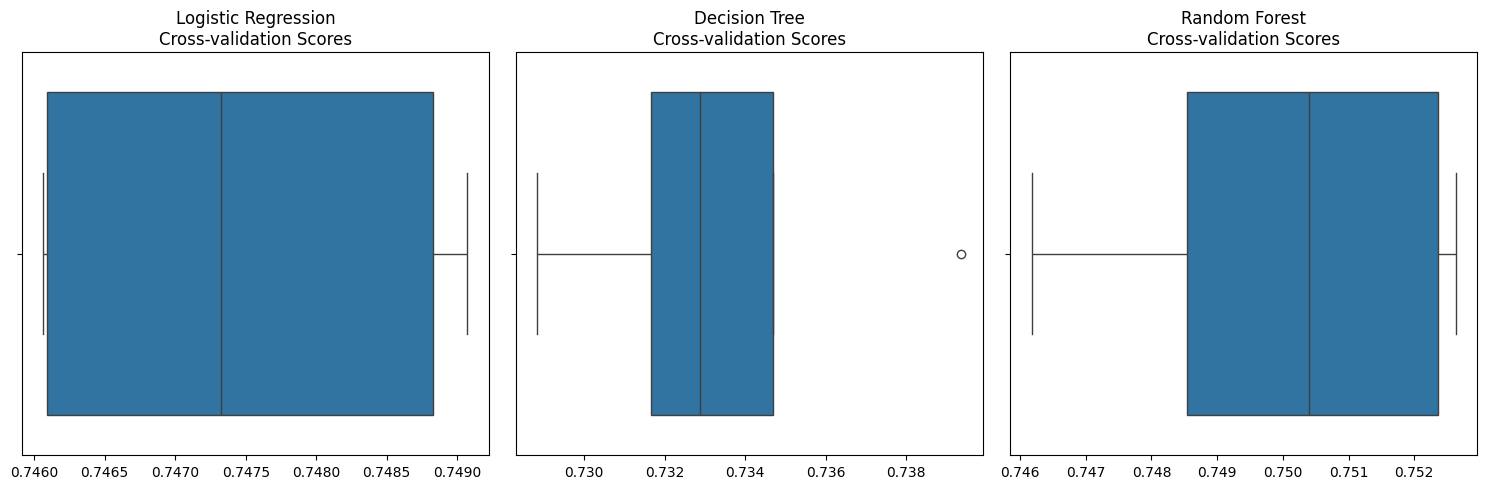

In [ ]:
plt.figure(figsize=(15, 5))
for i, (name, res) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=res['cv_scores'])
    plt.title(f'{name}\nCross-validation Scores')
plt.tight_layout()
plt.show()

**ROC curves**

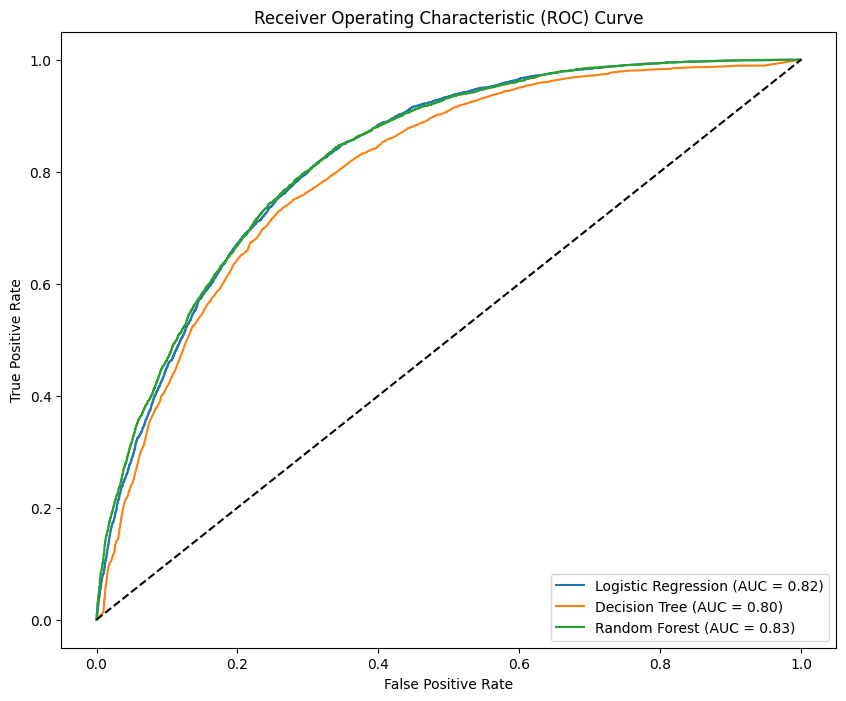

In [ ]:
plt.figure(figsize=(10, 8))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['y_pred_proba'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Feature importance**

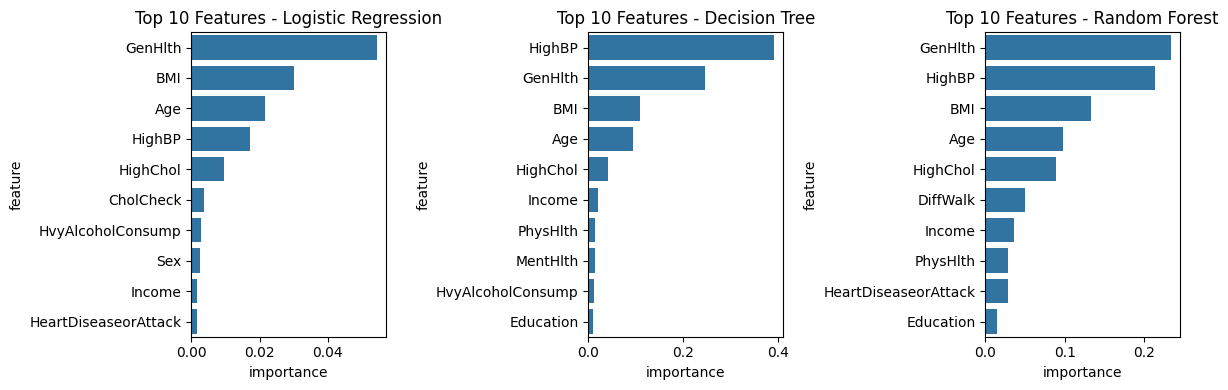

In [ ]:
plt.figure(figsize=(12, 4))
for i, (name, res) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)
    feature_importance = pd.DataFrame({'feature': X.columns, 'importance': res['feature_importance']})
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title(f'Top 10 Features - {name}')
    plt.tight_layout()
plt.show()

**Print results**

In [ ]:
for name, res in results.items():
    print(f"\n{name} Performance:")
    print(f"Mean CV Score: {res['cv_scores'].mean():.4f}")
    print(f"Accuracy: {res['accuracy']:.4f}")
    print(f"Precision: {res['precision']:.4f}")
    print(f"Recall: {res['recall']:.4f}")
    print(f"F1-score: {res['f1_score']:.4f}")


Logistic Regression Performance:
Mean CV Score: 0.7475
Accuracy: 0.7485
Precision: 0.7373
Recall: 0.7699
F1-score: 0.7532

Decision Tree Performance:
Mean CV Score: 0.7335
Accuracy: 0.7305
Precision: 0.7086
Recall: 0.7805
F1-score: 0.7428

Random Forest Performance:
Mean CV Score: 0.7500
Accuracy: 0.7516
Precision: 0.7296
Recall: 0.7971
F1-score: 0.7619
